In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [3]:
#v포아송 분포의 표본평균 분포

l = 3
rv = stats.poisson(l)

n =10
sample_size = int (1e5)
Xs_sample = rv.rvs ( ( n, sample_size ))
sample_mean = np.mean (Xs_sample, axis=0)

np.mean (sample_mean) , np.var (sample_mean)

(3.001, 0.304)

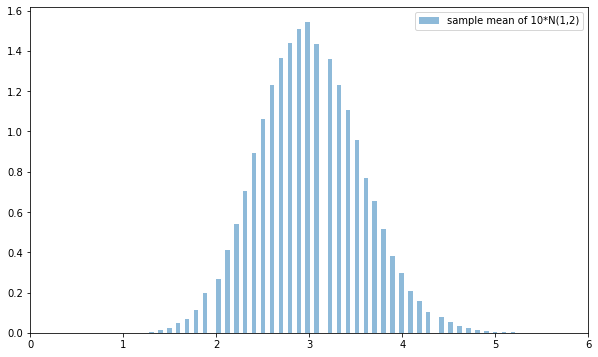

In [4]:
#v포아송 분포의 표본평균 분포

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist ( sample_mean, bins = 100, 
        density = True, alpha = 0.5, label = 'sample mean of 10*N(1,2)')

ax.legend()
ax.set_xlim( 0, 6)
plt.show()
# 포아송 분포의 표본분포는 근사적으로 정규분포를 따름

In [9]:
#중심극한정리

l = 3
rv = stats.poisson(l)

n =10000
sample_size = 10000
Xs_sample = rv.rvs ( ( n, sample_size ))
sample_mean = np.mean (Xs_sample, axis=0)

rv_true = stats.norm ( l, np.sqrt( 1/n ))
xs = np.linspace (rv_true.isf(0.999), rv_true.isf (0.001), 100)

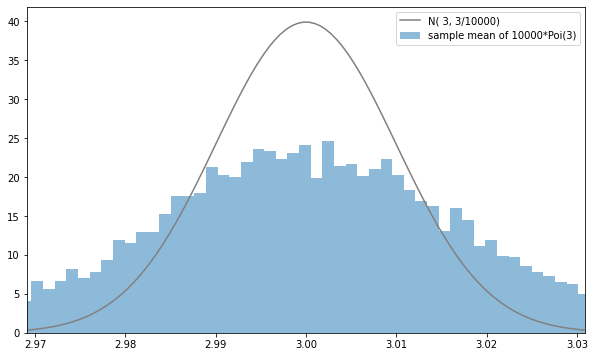

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist ( sample_mean, bins = 100, density = True,
          alpha = 0.5, label = 'sample mean of 10000*Poi(3)')
ax.plot ( xs, rv_true.pdf (xs),  label = 'N( 3, 3/10000) ', color ='gray')

ax.legend()
ax.set_xlim (rv_true.isf(0.999), rv_true.isf (0.001) )
plt.show()

### 정규분포 형태에 가까워지고 있어야 함... ㅠㅠ;;;

In [7]:
# 책의 코드 (from Github)
#https://github.com/ghmagazine/python_stat_sample/blob/master/notebook/chap09.ipynb

l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_

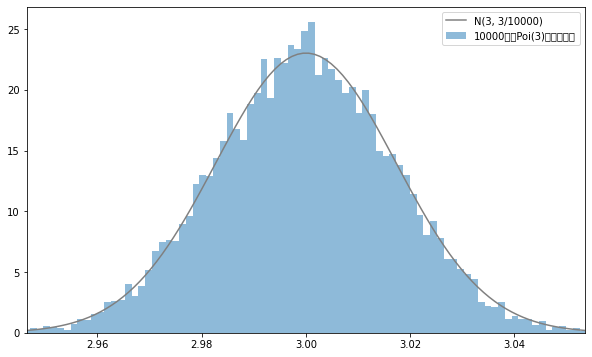

In [8]:
# 책의 코드 (from Github)
#https://github.com/ghmagazine/python_stat_sample/blob/master/notebook/chap09.ipynb

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='10000個のPoi(3)の標本平均')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

**대수의 법칙** (Law of large numbers)
표본 크기를 키우면 표본평균은 모평균에 수렴한다는 주장


In [11]:
p = 1/6
rv = stats.bernoulli (p)

n = int (1e5)
sample = rv.rvs ((n,4))
space = np.linspace (100, n, 50).astype(int)
plot_list = np.array ([ np.mean (sample[:sp], axis=0)
                        for sp in space]).T

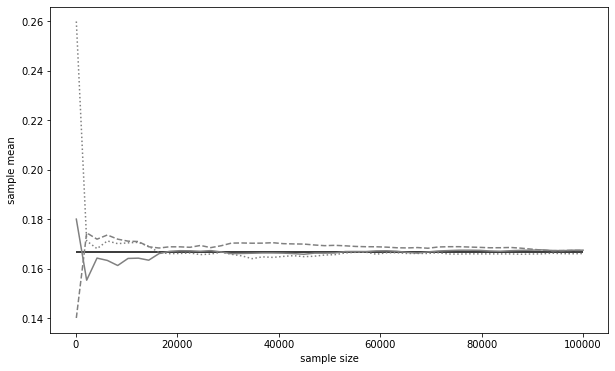

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot (space, pl, ls=ls, color= 'gray')
ax.hlines( p, -1, n, 'k')
ax.set_xlabel (' sample size ')
ax.set_ylabel (' sample mean ')

plt.show()

In [15]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12474 missing from current font.
  font.set_

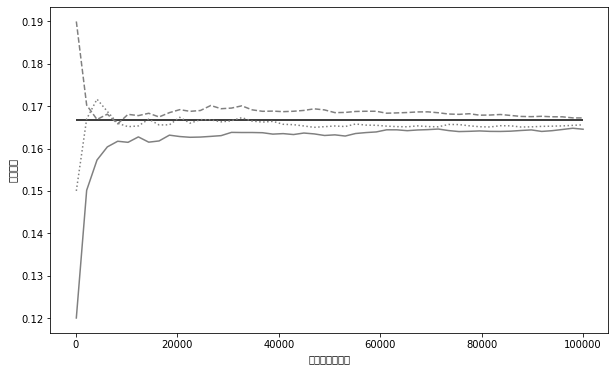

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('サンプルサイズ')
ax.set_ylabel('標本平均')

plt.show()